Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<xarray.Dataset> Size: 26MB
Dimensions:    (lat: 94, lon: 192, time: 366, nbnds: 2)
Coordinates:
  * lat        (lat) float32 376B 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 768B 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Dimensions without coordinates: nbnds
Data variables:
    uwnd       (time, lat, lon) float32 26MB ...
    time_bnds  (time, nbnds) float64 6kB ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...
<xarray.Dataset

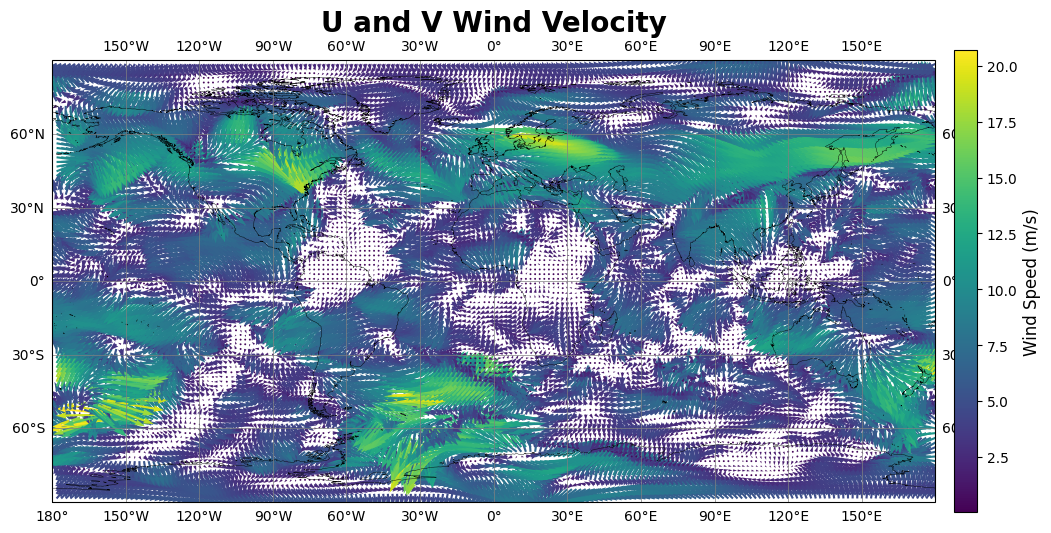

In [7]:

!pip install cartopy==0.21.1
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
datau = '/content/drive/My Drive/winds/uwind2024.nc'
dsu = xr.open_dataset(datau)
print(dsu)

datav = '/content/drive/My Drive/winds/vwind2024.nc'
dsv = xr.open_dataset(datav)
print(dsv)


u10 = dsu.uwnd
v10 = dsv.vwnd
lat = dsu.lat[::-1]
lon = dsu.lon[:]

print(u10)
print(v10)


magnitude = np.sqrt(u10[0, :, :]**2 + v10[0, :, :]**2 )

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.coastlines(resolution='50m', linewidth=0.3, color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
             xlocs=range(-180, 180, 30), ylocs=range(-90, 90, 30))
ax.set_title('U and V Wind Velocity', fontsize=20, fontweight='bold')


q = ax.quiver(
    lon, lat,
    u10[0, :, :], v10[0, :, :],
    magnitude,
    cmap='viridis',
    scale=300,
    transform=ccrs.PlateCarree()
)

cb = plt.colorbar(q, ax=ax, orientation='vertical', fraction=0.03, pad=0.02)
cb.set_label('Wind Speed (m/s)', fontsize=12)

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<xarray.Dataset> Size: 26MB
Dimensions:    (lat: 94, lon: 192, time: 366, nbnds: 2)
Coordinates:
  * lat        (lat) float32 376B 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 768B 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Dimensions without coordinates: nbnds
Data variables:
    uwnd       (time, lat, lon) float32 26MB ...
    time_bnds  (time, nbnds) float64 6kB ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...
<xarray.Dataset

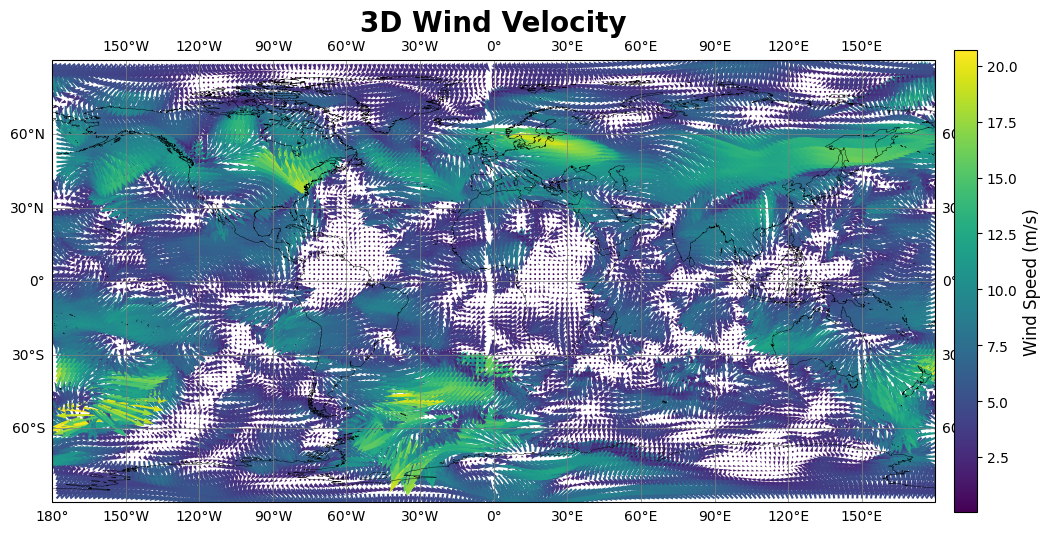

In [5]:
!pip install cartopy==0.21.1
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
datau = '/content/drive/My Drive/winds/uwind2024.nc'
dsu = xr.open_dataset(datau)
print(dsu)

datav = '/content/drive/My Drive/winds/vwind2024.nc'
dsv = xr.open_dataset(datav)
print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
dso = xr.open_dataset(datao)
print(dso)

u10 = dsu.uwnd
v10 = dsv.vwnd
o10 = dso.omega
lat = dsu.lat[::-1]
lon = dsu.lon[:]
level = dso.level[:]

print(u10)
print(v10)
print(o10)

# Ensure dimensions are aligned for magnitude calculation
# Select the same time index and level for all variables
time_index = 0  # Example: Selecting the first time step
level_index = 0 # Example: Selecting the first level

u_data = u10.isel(time=time_index)
v_data = v10.isel(time=time_index)
o_data = o10.isel(time=time_index, level=level_index)

# Interpolate o_data to match the grid of u_data and v_data
o_data_interp = o_data.interp_like(u_data)

magnitude = np.sqrt(u_data**2 + v_data**2 + o_data_interp**2)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.coastlines(resolution='50m', linewidth=0.3, color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
             xlocs=range(-180, 180, 30), ylocs=range(-90, 90, 30))
ax.set_title('3D Wind Velocity', fontsize=20, fontweight='bold')  # Updated title

# Updated quiver plot using magnitude for color
q = ax.quiver(
    lon, lat,
    u_data, v_data,
    magnitude,  # Use magnitude for color
    cmap='viridis',  # Changed colormap
    scale=300,      # Adjusted scale for better visualization
    transform=ccrs.PlateCarree()
)

cb = plt.colorbar(q, ax=ax, orientation='vertical', fraction=0.03, pad=0.02)
cb.set_label('Wind Speed (m/s)', fontsize=12)

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 25)


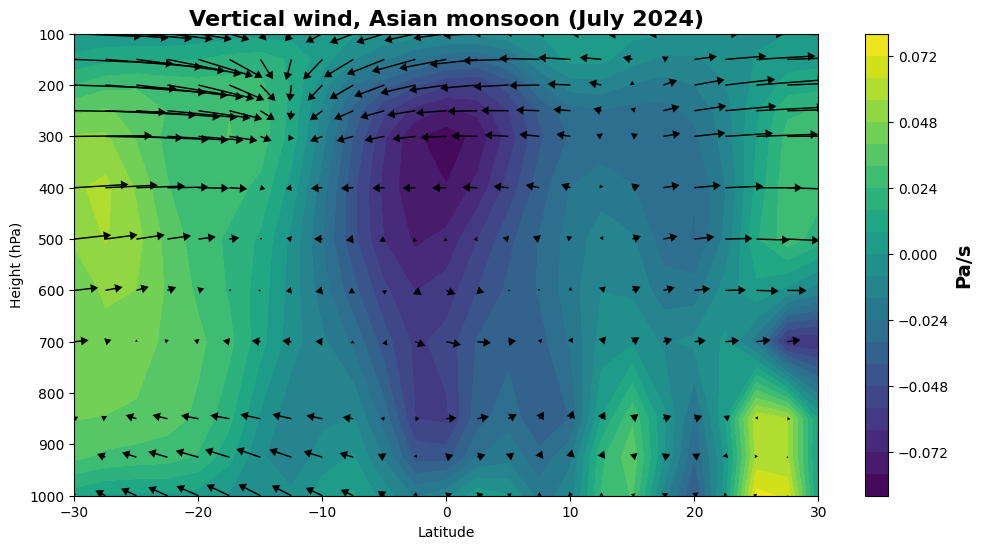

In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(30, -30)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 90  # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, Asian monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 19)


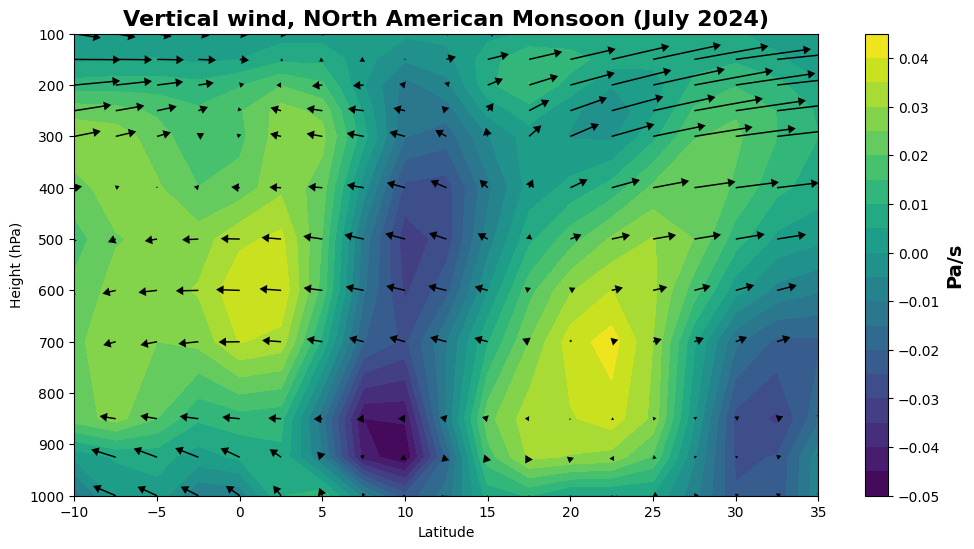

In [39]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(35, -10)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 250  # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, NOrth American Monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 7)


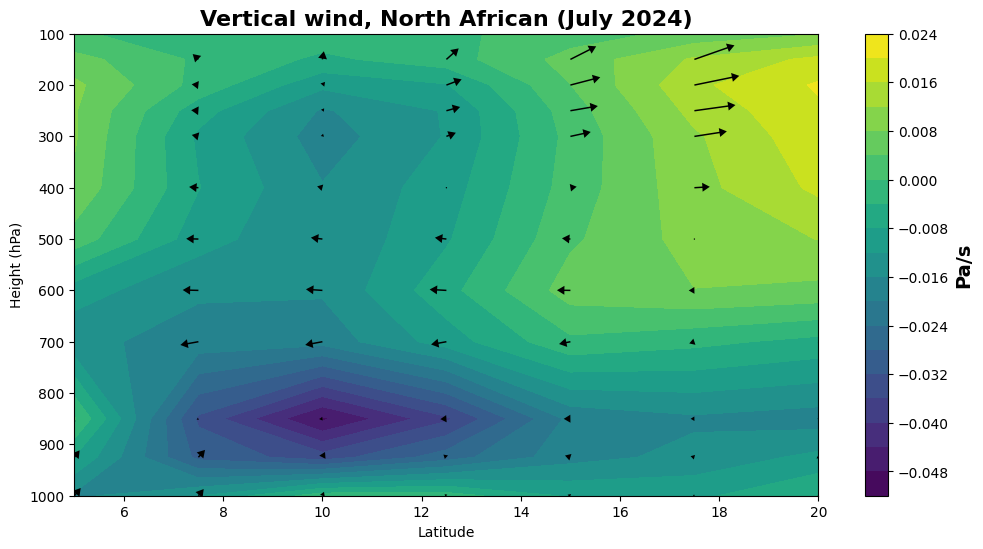

In [40]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(20, 5)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 0 # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, North African (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 13)


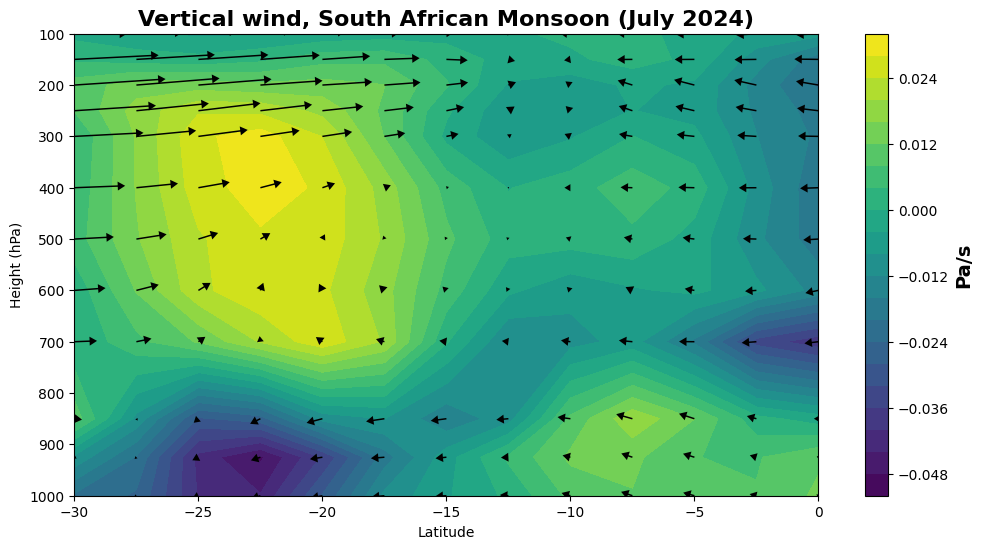

In [41]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(0, -30)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 30  # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, South African Monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 11)


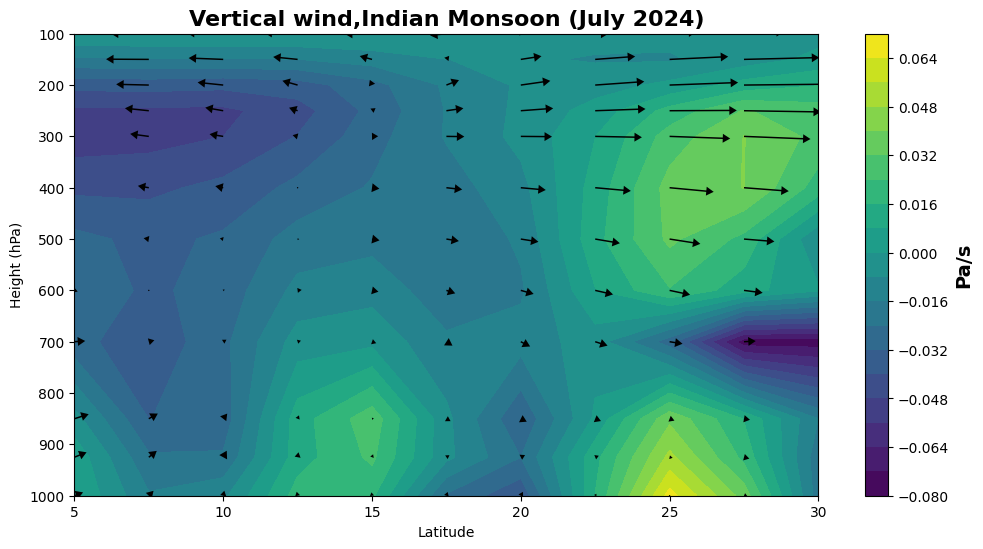

In [47]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(30, 5)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 85  # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind,Indian Monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 13)


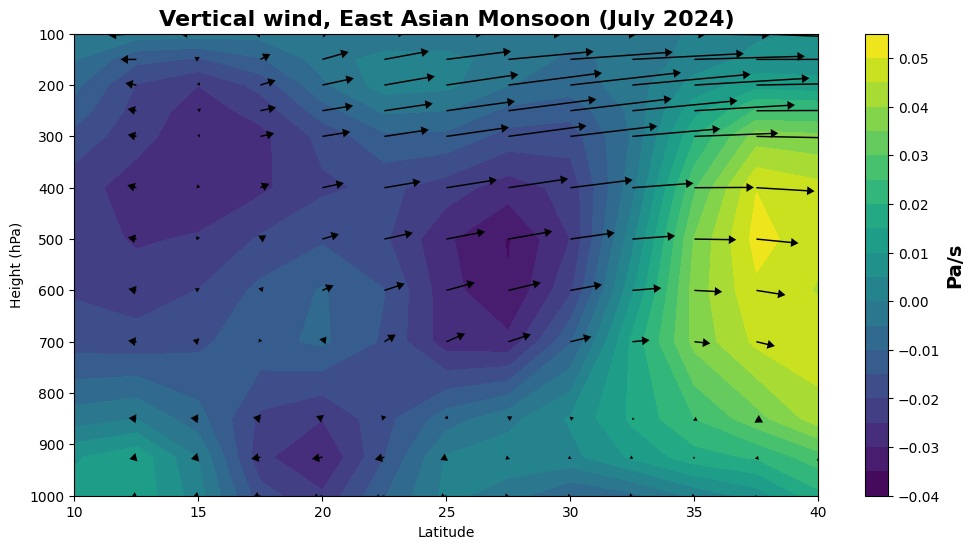

In [48]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(40, 10)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 120 # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, East Asian Monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 11)


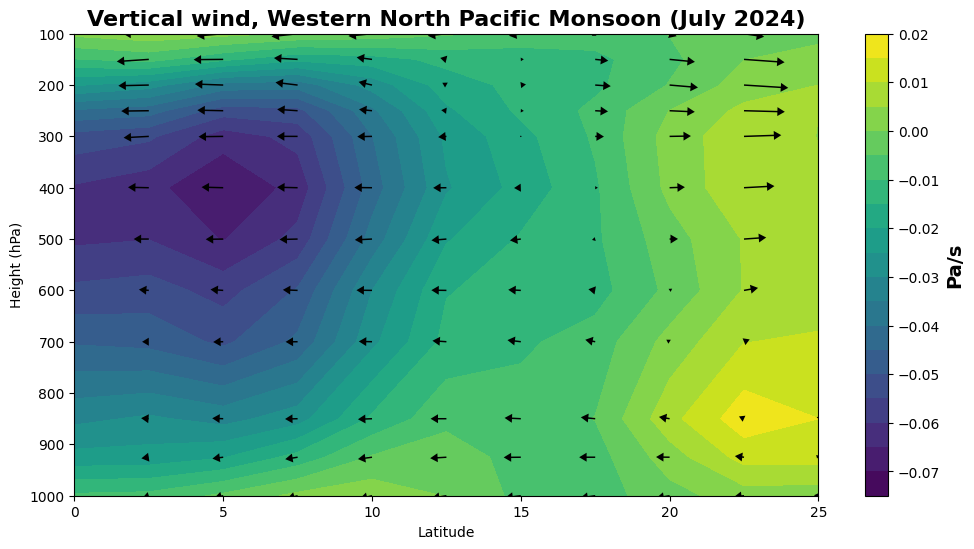

In [49]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(25, 0)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 135  # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, Western North Pacific Monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 13)


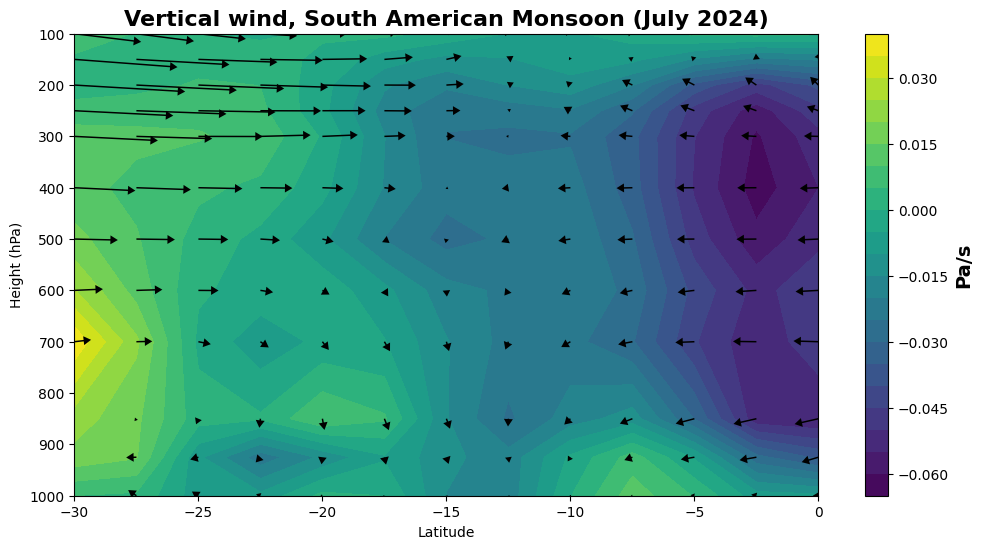

In [50]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(0, -30)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 300  # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, South American Monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New omega_subset shape: (12, 9)


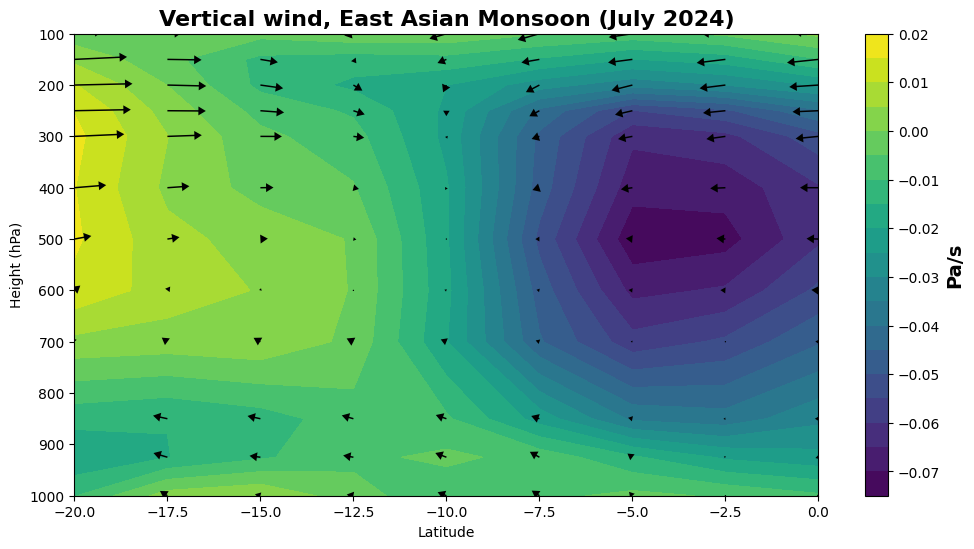

In [51]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
datau = '/uwnd.2024.nc'
uwnd = xr.open_dataset(datau)["uwnd"]
#print(dsu)

datav = '/vwnd.2024.nc'
vwnd = xr.open_dataset(datav)["vwnd"]
#print(dsv)


datao = '/content/drive/My Drive/winds/omega.2024.nc'
omega = xr.open_dataset(datao)["omega"]
#print(dso)
# Load data
#uwnd = xr.open_dataset("uwnd.2024.nc")["uwnd"]
#vwnd = xr.open_dataset("vwnd.2024.nc")["vwnd"]
#omega = xr.open_dataset("omega.2024.nc")["omega"]

# Selecting nearest latitude range (within available values)
lat_range = slice(0, -20)  # Matches dataset values

# Selecting valid pressure levels
plevels = slice(1000, 100)  # Ensures correct order in dataset

# Selecting a valid longitude (nearest available in dataset)
lon_selected = 135  # 90° exists in dataset, no need for nearest method

# Extract and average over time
omega_subset = omega.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
uwnd_subset = uwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")
vwnd_subset = vwnd.sel(lat=lat_range, level=plevels, lon=lon_selected).mean(dim="time")

# Check shape again
print("New omega_subset shape:", omega_subset.shape)



# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
lat = uwnd_subset.lat
plevel = uwnd_subset.level

# Create a background plot for omega
cf = ax.contourf(lat, plevel, omega_subset, levels=20, cmap="viridis")

# Add quiver plot for wind
ax.quiver(lat, plevel, uwnd_subset, vwnd_subset,
         scale=250, width=0.002, headwidth=6, headlength=5, headaxislength=5)

# Labels and title
ax.set_title("Vertical wind, East Asian Monsoon (July 2024)", fontsize=16, fontweight='bold')
ax.set_xlabel("Latitude")
ax.set_ylabel("Height (hPa)")

# Add colorbar
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label("Pa/s", fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Invert pressure levels
plt.show()